In [ ]:
# https://huggingface.co/am-azadi/EXIST2024_Task1_xlmRoberta_large_3_16_merged_unshuffled

In [ ]:
import json
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from sklearn import metrics
import matplotlib.pyplot as plt

# xlmRoBERTa

In [ ]:
# Load the tokenizer and model
model_name = "am-azadi/EXIST2024_Task1_xlmRoberta_large_3_16_merged_unshuffled"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# use the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load the dataset
with open("EXIST2024_dev.json", "r") as file:
    data = json.load(file)

# Function to preprocess and predict
def predict_sexism(tweet):
    inputs = tokenizer(tweet, return_tensors="pt", truncation=True, max_length=128)
    inputs = inputs.to(device) # FASTER COMPUTATION
    outputs = model(**inputs)
    logits = outputs.logits
    return torch.argmax(logits, dim=-1).item()

In [ ]:
result = [
    {
        "test_case": "EXIST2024",
        "id": value["id_EXIST"],  # Use the id directly from subset_data
        "actual": "YES" if value["labels_task1"].count("YES") >= 4 else "NO",
        "value": "YES" if predict_sexism(value["tweet"]) == 1 else "NO",
    }
    for value in data.values()
]

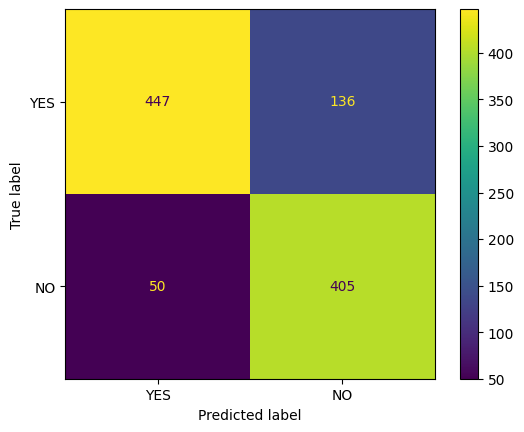

In [ ]:
# Confusion matrix

actual = [item["actual"] for item in result]
predicted = [item["value"] for item in result]

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['YES', 'NO'])

cm_display.plot()
plt.show()

In [ ]:
print(metrics.classification_report(actual, predicted))

              precision    recall  f1-score   support

          NO       0.90      0.77      0.83       583
         YES       0.75      0.89      0.81       455

    accuracy                           0.82      1038
   macro avg       0.82      0.83      0.82      1038
weighted avg       0.83      0.82      0.82      1038



In [ ]:
# Save the predictions in a Json file
with open("preds_task1_hard.json", "w") as file:
    json.dump(result, file)